# Projet IA: Credit Score Card Prediction

Presenté par **AICHA OUSSEINI: Master 2 SBD**

## Contexte: 
La solvabilité des clients est un enjeu stratégique majeur dans le domaine du crédit et des services financiers. Elle permet de limiter les risques pour les institutions financières tout en favorisant un accès responsable au crédit pour les particuliers. Dans ce contexte, les systèmes de scoring de crédit, basés sur des techniques de machine learning, jouent un rôle clé en permettant des évaluations rapides et précises de la capacité d'un client à honorer ses engagements financiers.

Ce projet s'inscrit dans cet objectif en exploitant deux bases de données principales :
- application_record : Contient les informations personnelles et socio-économiques des clients, telles que leur âge, leur situation professionnelle, leur revenu, leur situation familiale, etc.
- credit_record : qui  nregistre l'historique des transactions de crédit, y compris les paiements, les retards, et les statuts de crédit.

Notre objectif est d'identifier le modèle qui présente les meilleures performances en fonction de l'objectif final de l'entreprise  

## Plan du travail:

 1: récupération des données et quelques traitements de base

 2:  Analyse de données

 3:  Prétraitement

 4:  Modélisation

 5:   Optimisation des Modèles

 6:   Résultats et Interprétation 

 7:   Conclusion


### 1: récupération des données et quelques traitements de base

In [1]:
import pandas as pd
# Charger les fichiers
application_record = pd.read_csv("C:\\Users\\user\\Desktop\\transfer_8882036_files_a2dcbb37\\application_record.csv")
credit_record = pd.read_csv("C:\\Users\\user\\Desktop\\transfer_8882036_files_a2dcbb37\\credit_record.csv")


In [2]:
print(credit_record.head())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C



Les jeux de données, comprennent des informations personnelles (anonymisées) et des données soumises par les demandeurs de cartes de crédit, étiquetées avec le statut de leurs défauts de paiement.
Ces étiquettes, ou catégories de risque de crédit, sont :

 - **X:**  Aucun prêt pour le mois

 - **C:**  Remboursé ce mois-ci

 - **0:** 1-29 jours de retard

 - **1:** 30-59 jours de retard

 - **2:** 60-89 jours de retard

 - **3:** 90-119 jours de retard

 - **4:** 120-149 jours de retard
 
 - **5:** Impayés ou créances irrécouvrables, radiations de plus de 150 jours

Les données typiques du demandeur incluent la propriété d'une propriété, d'une voiture, le statut marital, le nombre d'enfants, etc."

### Quelques traitements de base

In [3]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [4]:

application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


conversion de la colonne DAYS_BIRTH en années 

In [6]:
# Conversion de DAYS_BIRTH   en années

application_record['AGE_YEARS'] = -(application_record['DAYS_BIRTH']) // 365

# Afficher un aperçu après la conversion
print(application_record[['DAYS_BIRTH', 'AGE_YEARS']].head())
# Supprimer la colonne "DAYS_BIRTH"
application_record = application_record.drop("DAYS_BIRTH", axis=1)
application_record

   DAYS_BIRTH  AGE_YEARS
0      -12005         32
1      -12005         32
2      -21474         58
3      -19110         52
4      -19110         52


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243,1,0,0,0,NaN,1.0,62
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007,1,0,0,0,Laborers,1.0,43
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372,1,1,0,0,Sales staff,1.0,22
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,0,0,NaN,2.0,59


In [7]:
# Coversion de la colonne DAYS_EMPLOYED en Années

application_record['DAYS_EMPLOYEDD'] = -(application_record['DAYS_EMPLOYED']) // 365

# Afficher un aperçu après la conversion
print(application_record[['DAYS_EMPLOYED', 'DAYS_EMPLOYEDD']].head())
#Supprimer la colonne "DAYS_EMPLOYED"
application_record = application_record.drop("DAYS_EMPLOYED", axis=1)




   DAYS_EMPLOYED  DAYS_EMPLOYEDD
0          -4542              12
1          -4542              12
2          -1134               3
3          -3051               8
4          -3051               8


Creation de la matrice de transition

In [8]:
import pandas as pd
import numpy as np

# Créer une table pivot pour la matrice de transition
# Regrouper par ID et MONTH puis décaler la colonne STATUS
credit_record['STATUS_next'] = credit_record.groupby('ID')['STATUS'].shift(-1)

# Créer une table pivot
transition_matrix = pd.pivot_table(credit_record, values='MONTHS_BALANCE', index='STATUS', columns='STATUS_next', aggfunc='count', fill_value=0)

# Normaliser la matrice pour obtenir des probabilités de transition
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
transition_matrix


STATUS_next,0,1,2,3,4,5,C,X
STATUS,,,,,,,,
0,0.895638,0.015051,0.000589,0.000073,0.000031,0.000065,0.000000,0.088553
1,0.637086,0.308026,0.012368,0.001264,0.000000,0.000361,0.000090,0.040805
2,0.118664,0.644009,0.158986,0.025346,0.003456,0.008065,0.000000,0.041475
3,0.050000,0.018750,0.803125,0.087500,0.006250,0.015625,0.000000,0.018750
4,0.004484,0.000000,0.031390,0.829596,0.098655,0.000000,0.000000,0.035874
5,0.026005,0.001182,0.000000,0.001773,0.085697,0.861111,0.000000,0.024232
C,0.043170,0.002260,0.000145,0.000045,0.000061,0.000154,0.949556,0.004608
X,0.142556,0.002084,0.000189,0.000084,0.000042,0.000247,0.000000,0.854798


**Interpretation:**

La matrice montre la probabilité de transition d'un état de statut de crédit ("STATUS") à un autre au cours du mois suivant ("STATUS_next"). Chaque ligne correspond à un statut initial, et chaque colonne indique la probabilité d'atteindre un statut particulier le mois suivant.


- **Statut "C" (Remboursé ce mois-ci):**

Une grande proportion des clients dans le statut "C" restent solvables et continuent de rembourser (94.95 %). Cela reflète un comportement de crédit responsable pour ce groupe.

- **Statut "0" (1-29 jours de retard):**

La probabilité que les clients dans ce statut passent au statut "1" (30-59 jours de retard) est relativement faible (1.5 %), tandis qu'une majorité (89.56 %) reviennent directement au statut "X" ou "C". Cela montre que de nombreux clients corrigent rapidement leurs retards.

- **Statuts ("1" à "5"):**

Ces statuts montrent des transitions progressives vers des retards plus graves (par exemple, un passage de "1" à "2" ou "2" à "3"). 
Analyse approfondie :

- **Statut "X" (Aucun prêt ce mois-ci):**

Les clients ayant un statut "X" restent en grande majorité dans ce statut (85.47 %). Cela signifie que la majorité des clients sans prêt ce mois-ci continuent à ne pas avoir de prêt le mois suivant. X ne nous sert pas dans ce travail, on peut donc le supprimer


 **Segmentation des clients selon leurs comportements :**

- Les clients ayant des statuts **"C"** ou **"0"** peuvent être considérés comme **solvables**, car ils remboursent leurs crédits a temps ou on un léger rétard.

- Les clients dans les statuts **"1"**, **"2"**,**"3"** et **"5"** représentent des profils à haut risque, avec des retards graves ou des créances irrécouvrables.


 **Définition des étiquettes pour le machine learning :**

on  définit un client comme **solvable** s'il se trouve dans les statuts "0" ou "C" à la fin d'une période donnée.
Un client peut être défini comme **insolvable** s'il atteint les statuts "1" a "5".


**Construction des étiquettes de la variable cible**

In [9]:
# Create the 'y-status' column based on the conditions
credit_record['y-status'] = credit_record['STATUS'].map(lambda x: 1 if x in ['0', 'C'] else 0 if x in ['1', '2', '3', '4', '5'] else np.nan)

# Remove rows where 'STATUS' is 'X'
credit_record = credit_record[credit_record['STATUS'] != 'X']


# Display the updated DataFrame
credit_record

# Group by 'ID' and get the most frequent 'STATUS' for each ID
most_frequent_status = credit_record.groupby('ID')['y-status'].agg(lambda x: x.value_counts().index[0])
most_frequent_status
# Create a new DataFrame with unique IDs and their most frequent status
result_df = pd.DataFrame({'ID': most_frequent_status.index, 'y-status': most_frequent_status.values})
# Remove rows where 'y-status' is NaN (resulting from 'X' values in 'STATUS')
result_df = result_df[result_df['y-status'].notna()]
# Supprimer les valeurs manquantes de la colonne y-status

# Display the resulting DataFrame
result_df

result_df['y-status'].value_counts()


y-status
1.0    41190
0.0      259
Name: count, dtype: int64

In [10]:
 # jointure des deux tables

# Joindre les deux DataFrames en utilisant la colonne 'ID'
final_df = pd.merge(application_record, result_df, on='ID', how='left')

# Afficher le DataFrame final
final_df.head()



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,DAYS_EMPLOYEDD,y-status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,NaN


In [11]:
# shows count of rows and columns
final_df.shape

(438557, 19)

In [12]:
# Détection des doublons
print("Nombre de doublons :", final_df.duplicated().sum())



Nombre de doublons : 0


In [13]:
# Vérifivation des incohérences dans les colonnes catégoriques
for col in final_df.select_dtypes(include=['object']).columns:
    print(f"Valeurs uniques pour {col} :", final_df[col].unique())


Valeurs uniques pour CODE_GENDER : ['M' 'F']
Valeurs uniques pour FLAG_OWN_CAR : ['Y' 'N']
Valeurs uniques pour FLAG_OWN_REALTY : ['Y' 'N']
Valeurs uniques pour NAME_INCOME_TYPE : ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Valeurs uniques pour NAME_EDUCATION_TYPE : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Valeurs uniques pour NAME_FAMILY_STATUS : ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Valeurs uniques pour NAME_HOUSING_TYPE : ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Valeurs uniques pour OCCUPATION_TYPE : [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'I

In [14]:
print(final_df.columns)  # Affiche les colonnes de final_df


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE_YEARS', 'DAYS_EMPLOYEDD', 'y-status'],
      dtype='object')


In [15]:
print(final_df.dtypes)  # Affiche les types de données des colonnes de final_df


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS                int64
DAYS_EMPLOYEDD           int64
y-status               float64
dtype: object


In [16]:
# Vérifier les valeurs manquantes
final_df = final_df.dropna(subset=['y-status'])
print(final_df.isnull().sum())



ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10373
CNT_FAM_MEMBERS            0
AGE_YEARS                  0
DAYS_EMPLOYEDD             0
y-status                   0
dtype: int64


In [17]:
 ## Afficher les NA pour la colonne OCCUPATION_TYPE
na_occupation = final_df[final_df['OCCUPATION_TYPE'].isnull()]
# Ressortir la distribution de y_status parmis les NA de la colonne OCCUPATION_TYPE
print(na_occupation['y-status'].value_counts(normalize=True) * 100)

y-status
1.0    99.344452
0.0     0.655548
Name: proportion, dtype: float64


  **Interpretation:**

dans notre base de donnée finale, seule la variable **OCCUPATION_TYPE** contient des valeurs Manquantes,Parmis ces valeurs, les distribution de la variable cible y-status sont les suivants: 

99.34 pourcent pour 1
et 0.64 pourcents pour 0

Dès lors, on ne peut pas supprimer ces valeurs manquantes. On va donc procéder à l'imputation. On peut imputer les valeurs manquantes par la moyenne, la régression, la moyenne pondérée ou l'arbre de décision, mais on a choisi de les imputer avec le **mode**.

In [18]:
# Créer une copie explicite pour éviter les avertissements liés aux vues
final_df = final_df.copy()

# Imputation des valeurs manquantes par le mode
mode_occupation = final_df['OCCUPATION_TYPE'].mode()[0]
final_df['OCCUPATION_TYPE'] = final_df['OCCUPATION_TYPE'].fillna(mode_occupation)


### 2: analyse de donnees

#### 2.1 Analyse univariée

In [19]:
final_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE_YEARS,DAYS_EMPLOYEDD,y-status
count,3.311000e+04,33110.000000,3.311000e+04,33110.0,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000
mean,5.078015e+06,0.427756,1.858772e+05,1.0,0.224011,0.292419,0.090396,2.194654,43.347901,-164.937753,0.993114
std,4.187679e+04,0.741716,1.014124e+05,0.0,0.416936,0.454881,0.286752,0.911076,11.545784,378.966907,0.082698
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,-1001.000000,0.000000
25%,5.041983e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,1.000000
50%,5.069441e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,42.000000,4.000000,1.000000
75%,5.114633e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,8.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,68.000000,43.000000,1.000000


In [20]:
final_df['NAME_FAMILY_STATUS'].value_counts(normalize=True) 

NAME_FAMILY_STATUS
Married                 0.686349
Single / not married    0.133887
Civil marriage          0.080217
Separated               0.057626
Widow                   0.041921
Name: proportion, dtype: float64

La pluspart des personnes sont **mariées**

In [21]:
final_df['CODE_GENDER'].value_counts(normalize=True) 

CODE_GENDER
F    0.671096
M    0.328904
Name: proportion, dtype: float64

on se rend compte qu'il y'a plus de **femme** que d'homme  dans la base de donnée

In [22]:
final_df['CNT_CHILDREN'].value_counts(normalize=True) 

CNT_CHILDREN
0     0.693416
1     0.203292
2     0.089610
3     0.011477
4     0.001571
5     0.000453
14    0.000091
7     0.000060
19    0.000030
Name: proportion, dtype: float64

On se rend compte que la majorité des personnes sont sans **enfants**

In [23]:


final_df['NAME_INCOME_TYPE'].value_counts(normalize=True) 


NAME_INCOME_TYPE
Working                 0.515766
Commercial associate    0.230353
Pensioner               0.170915
State servant           0.082634
Student                 0.000332
Name: proportion, dtype: float64

In [24]:
final_df['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.681184
Higher education                 0.268529
Incomplete higher                0.039021
Lower secondary                  0.010390
Academic degree                  0.000876
Name: proportion, dtype: float64

Environs 68 pourcents des personnes on le niveau d'etude secondaire

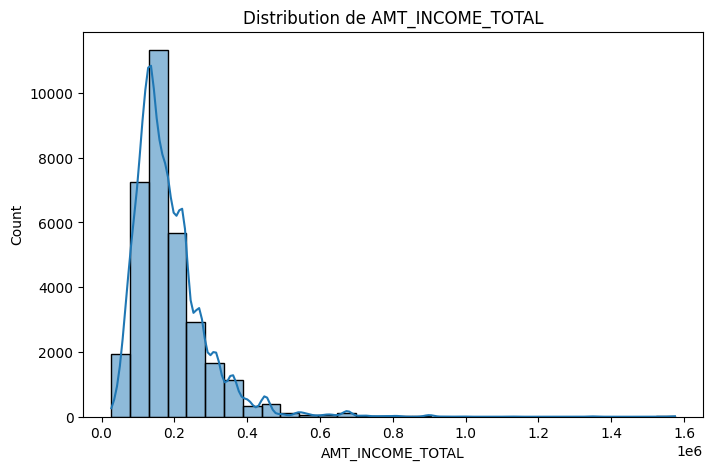

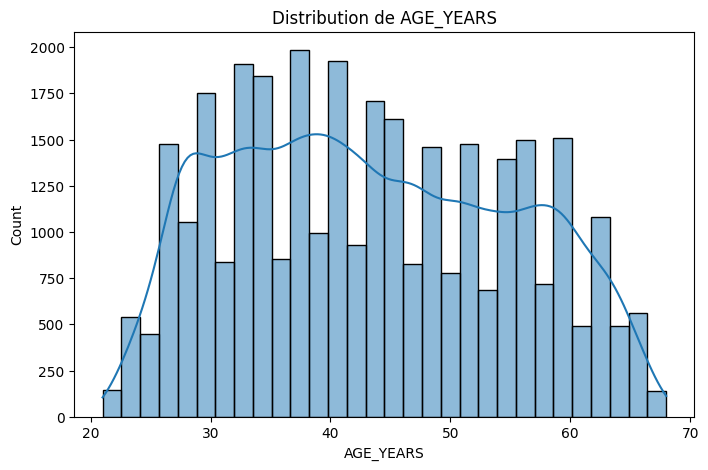

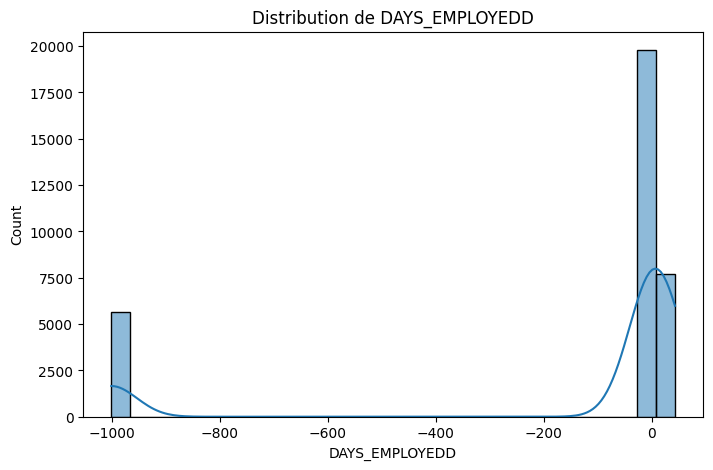

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation des variables numériques
numerical_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'DAYS_EMPLOYEDD', 'CNT_FAM_MEMBERS']
numerical= ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'DAYS_EMPLOYEDD',]

for col in numerical:
    plt.figure(figsize=(8, 5))
    sns.histplot(final_df[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    plt.show()

L'age des individus est compris entre **21** et **70** ans

 Calcul des deciles

In [26]:

# Calcul des quantiles (déciles) pour DAYS_EMPLOYED
deciles = final_df['DAYS_EMPLOYEDD'].quantile([0.1 * i for i in range(1, 11)])

# Afficher les déciles
print("\nDéciles de DAYS_EMPLOYED:")
print(deciles)



Déciles de DAYS_EMPLOYED:
0.1   -1001.0
0.2       0.0
0.3       1.0
0.4       2.0
0.5       4.0
0.6       5.0
0.7       7.0
0.8       9.0
0.9      14.0
1.0      43.0
Name: DAYS_EMPLOYEDD, dtype: float64


#### Analyse bivariée

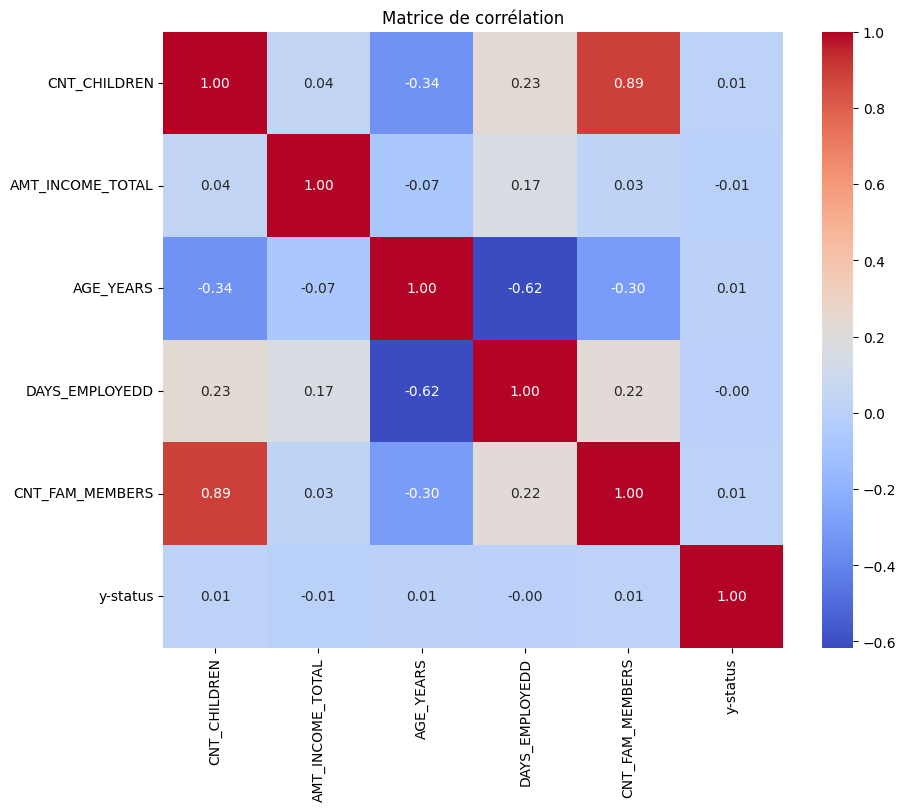

In [27]:
# Calcul et visualisation de la matrice de corrélation
correlation_matrix = final_df[numerical_columns + ['y-status']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


 **Interpretation:**

- **Corrélation forte positive:**

Il existe une corrélation très forte entre CNT_CHILDREN (nombre d'enfants) et CNT_FAM_MEMBERS (taille de la famille) avec un coefficient de 0.89. Cela est logique car la taille de la famille inclut le nombre d'enfants.

- **Corrélation forte négative:**

Une forte corrélation négative est observée entre AGE_YEARS (âge) et DAYS_EMPLOYEDD (jours employés) avec un coefficient de -0.62, ce qui peut indiquer que les personnes plus âgées ont souvent moins de jours d'emploi enregistrés, potentiellement en raison de retraites ou de transitions professionnelles.

La variable cible y-status (probablement l'étiquette de solvabilité) présente des corrélations très faibles (proches de 0) avec toutes les autres variables, ce qui suggère qu'il n'existe pas de relation linéaire évidente entre ces variables et la cible.

 **Conclusion:** 

Les variables CNT_CHILDREN et CNT_FAM_MEMBERS sont fortement corrélées et pourraient introduire une redondance dans le modèle. Une de ces variables pourrait être éliminée ou transformée pour réduire la colinéarité.

La faible corrélation entre y-status et les autres variables suggère que des relations non linéaires ou des interactions pourraient être plus pertinentes pour expliquer la solvabilité. 

Suppression de la colonne CNT_FAM_MEMBERS 

In [28]:
final_df = final_df.drop("CNT_FAM_MEMBERS", axis=1)

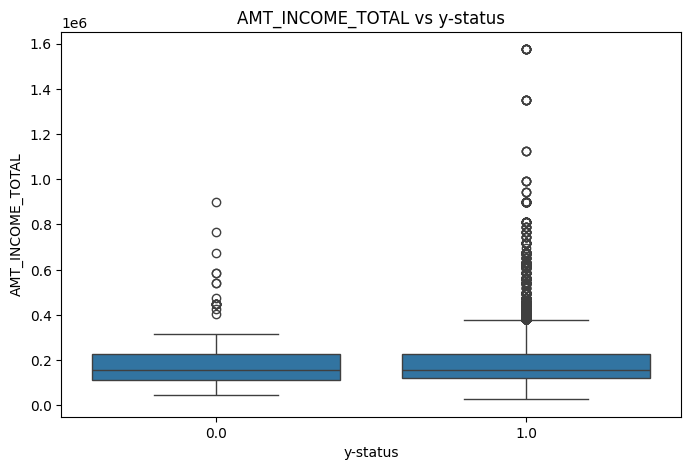

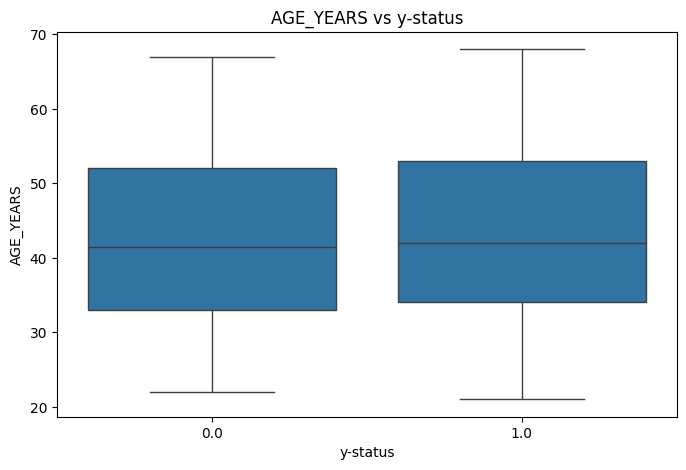

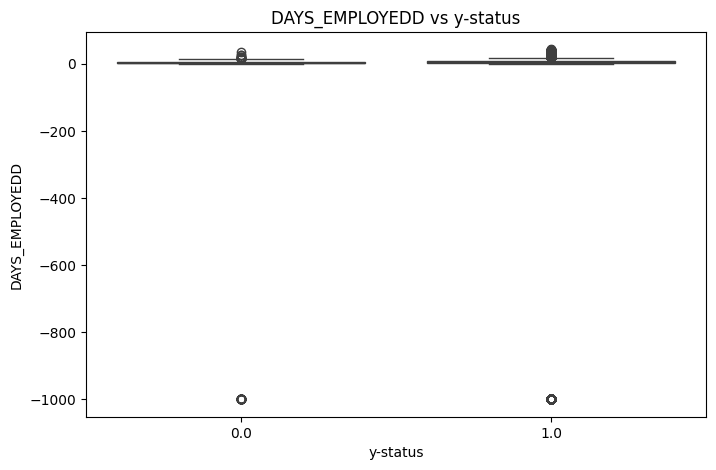

In [29]:
# Sélectionner les variables catégorielles et numériques
categorical = ['NAME_INCOME_TYPE','OCCUPATION_TYPE']
numerical = [ 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'DAYS_EMPLOYEDD']
# Analyse bivariée entre les variables numériques et 'y-status'
for col in numerical:
    plt.figure(figsize=(8, 5))
    df = final_df.dropna(subset=['y-status'])
    sns.boxplot(data=df, x='y-status', y=col)
    plt.title(f'{col} vs y-status')
    plt.show()

**Interpretation:**

D'apres ces graphiques: 

- La distribution des âges est presque identique pour les deux catégories, ce qui signifie que cette variable seule ne permet pas de distinguer les solvables des non-solvables.

- DAYS_EMPLOYEDD seul n’est pas un bon facteur discriminant entre les clients solvables et non solvables car La distribution des données pour les deux groupes est très similaire
 
- Les revenus totaux montrent une légère différence pour les outliers, mais la variable ne semble pas être un facteur très fort pour discriminer les deux groupes dans la majorité des cas. 

#### 3:  Pretraitement

In [30]:
 # Suppression des colonnes inutiles
columns_to_drop = ['ID']
# Supprimer la colonnes
final_df = final_df.drop(columns=columns_to_drop)
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE_YEARS,DAYS_EMPLOYEDD,y-status
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Laborers,32,12,1.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Laborers,32,12,1.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,58,3,1.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,8,1.0
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,8,1.0


**encodage des variables catégorielle**

In [31]:
import pandas as pd

# Identification des colonnes qualitatives (de type 'object' ou 'category')
categorical_columns = final_df.select_dtypes(include=['object', 'category']).columns

# Encodage one-hot sur toutes les colonnes qualitatives
final_df = pd.get_dummies(final_df, columns=categorical_columns, drop_first=True,dtype='int')

# Afficher le DataFrame encodé
final_df.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,AGE_YEARS,DAYS_EMPLOYEDD,y-status,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,427500.0,1,1,0,0,32,12,1.0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,427500.0,1,1,0,0,32,12,1.0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,112500.0,1,0,0,0,58,3,1.0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,270000.0,1,0,1,1,52,8,1.0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,270000.0,1,0,1,1,52,8,1.0,0,...,0,0,0,0,0,0,1,0,0,0


**Diviser les données en train et test puis Standardisation**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Séparer les caractéristiques (X) et la variable cible (y)
X = final_df.drop(columns=['y-status'])
y = final_df['y-status']

# Étape 3 : Diviser les données en ensembles d'entraînement et de test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Étape 4 : Standardisation 
# Standardisation : Mettre les données à une moyenne de 0 et un écart-type de 1
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Résultat final après préparation

print("X_train_standardized shape:", X_train_standardized .shape)
print("X_test_standardized shape:", X_test_standardized .shape)


X_train_standardized shape: (23177, 45)
X_test_standardized shape: (9933, 45)


#### **4: Modélisation**

 ##### Modèle de Régression Logistique et Random Forest

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# Modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_standardized, y_train)

# Modèle de forêt aléatoire
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)  # Les forêts aléatoires n'ont pas besoin de données standardisées

# Prédictions pour chaque modèle
y_pred_logistic = logistic_model.predict(X_test_standardized)
y_pred_rf = random_forest_model.predict(X_test)


##### Evaluation des Modèles

Évaluation du modèle : Régression Logistique
Accuracy : 0.99
Recall : 0.50
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.50      0.50      0.50      9933
weighted avg       0.99      0.99      0.99      9933



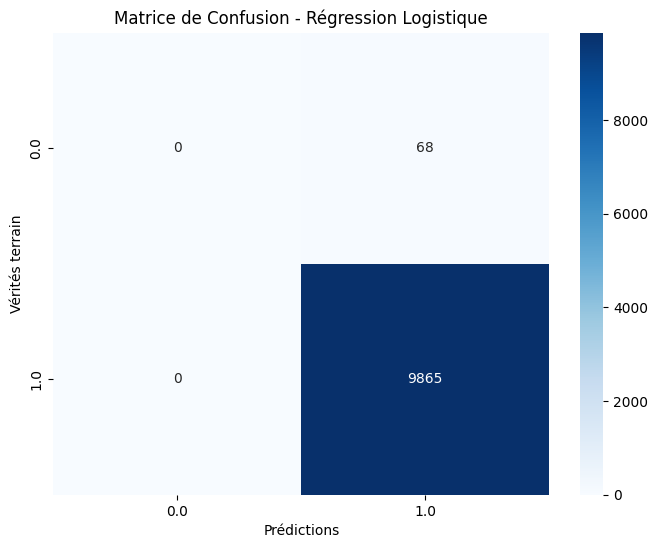

Évaluation du modèle : Random Forest
Accuracy : 0.99
Recall : 0.60
              precision    recall  f1-score   support

         0.0       0.48      0.21      0.29        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.74      0.60      0.64      9933
weighted avg       0.99      0.99      0.99      9933



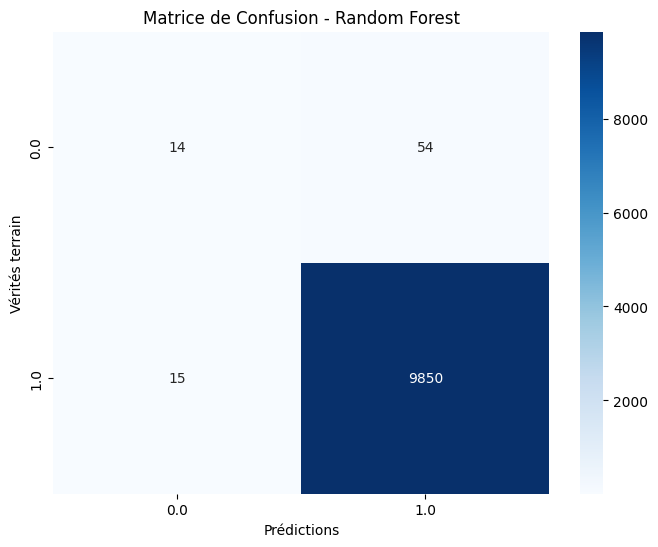

In [34]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

warnings.filterwarnings('ignore')

def evaluate_model(y_true, y_pred, model_name, labels):
    """
    Évalue un modèle et affiche les métriques clés ainsi qu'une matrice de confusion graphique.
    """
    print(f"Évaluation du modèle : {model_name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Recall : {recall_score(y_true, y_pred, average='macro'):.2f}")  # Macro pour multi-classes
    print(classification_report(y_true, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités terrain')
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.show()

# Obtenez les classes uniques pour les étiquettes
unique_classes = sorted(y_test.unique())  # Assurez-vous que `y_test` est sous forme de DataFrame ou Series

# Évaluer la régression logistique
evaluate_model(y_test, y_pred_logistic, "Régression Logistique", labels=unique_classes)

# Évaluer Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest", labels=unique_classes)


**Interpretation:** 

 Les deux modèles ont démontré une bonne capacité à prédire les bons payeurs, mais ont eu des difficultés à identifier les mauvais payeurs. Pour résoudre ce problème, nous allons faire **l'hyperparametrage** et  utiliser la technique de rééquilibrage des échantillons **SMOTE** (Synthetic Minority Over-sampling Technique) pour augmenter la représentation des mauvais payeurs dans notre jeu de données et améliorer la performance des modèles."

##### Rééquilibrage des Échantillons et Evaluation des Modèles

Évaluation du modèle : Régression Logistique
Accuracy : 0.90
Recall : 0.50
              precision    recall  f1-score   support

         0.0       0.01      0.09      0.01        68
         1.0       0.99      0.91      0.95      9865

    accuracy                           0.90      9933
   macro avg       0.50      0.50      0.48      9933
weighted avg       0.99      0.90      0.94      9933



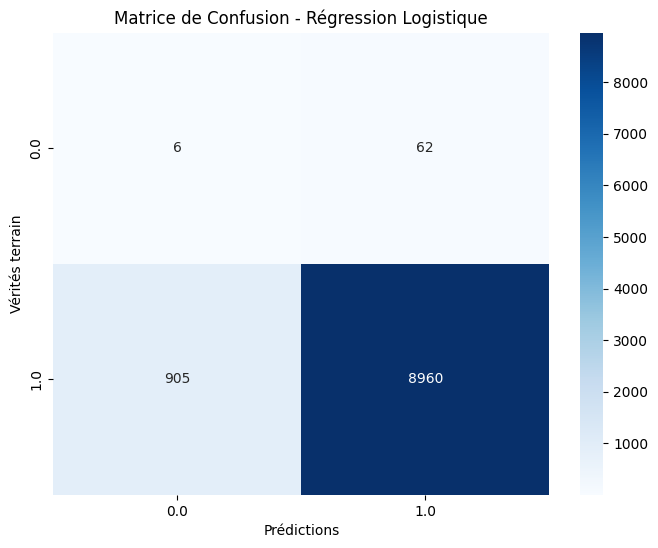

Évaluation du modèle : Forêt Aléatoire
Accuracy : 0.99
Recall : 0.63
              precision    recall  f1-score   support

         0.0       0.35      0.26      0.30        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.67      0.63      0.65      9933
weighted avg       0.99      0.99      0.99      9933



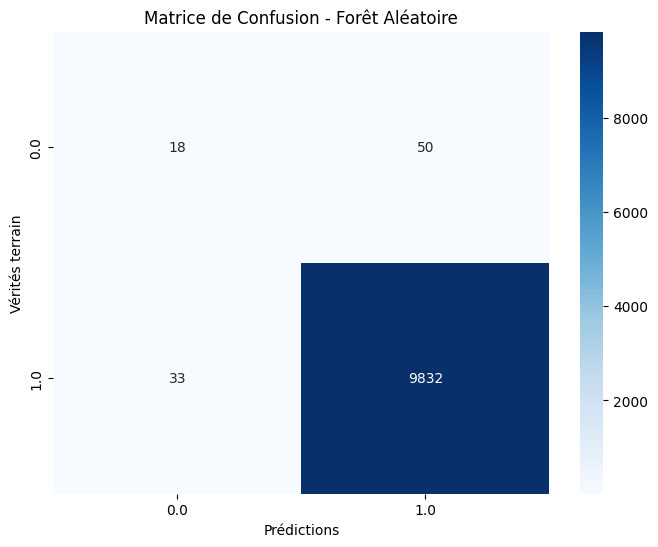

In [35]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

warnings.filterwarnings('ignore')

def evaluate_model(y_true, y_pred, model_name, labels):
    """
    Évalue un modèle et affiche les métriques clés ainsi qu'une matrice de confusion graphique.
    """
    print(f"Évaluation du modèle : {model_name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Recall : {recall_score(y_true, y_pred, average='macro'):.2f}")  # Macro pour multi-classes
    print(classification_report(y_true, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités terrain')
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.show()

# Obtenez les classes uniques pour les étiquettes
unique_classes = sorted(y_test.unique())

# Modèle de Régression Logistique avec ajustements
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_balanced, y_train_balanced)
y_pred_logistic = logistic_model.predict(X_test)

# Évaluer la régression logistique
evaluate_model(y_test, y_pred_logistic, "Régression Logistique", labels=unique_classes)

# Modèle de Forêt Aléatoire avec ajustements
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

# Évaluer la forêt aléatoire
evaluate_model(y_test, y_pred_rf, "Forêt Aléatoire", labels=unique_classes)



**Interpretation**

 **1. Modèle : Régression Logistique**
- **Accuracy : 0.90**
  - Bonne précision globale, mais attention à ne pas se fier uniquement à cette métrique dans un contexte déséquilibré.
- **Recall : 0.50**
  - La capacité à détecter correctement les mauvais payeurs (classe 0) et les bons payeurs (classe 1) est modérée.
- **Résultats par classe :**
  - **Classe 0 (mauvais payeurs)** :
    
    - **Rappel : 0.09** : Le modèle détecte seulement **9%** des mauvais payeurs réels.
    
  - **Classe 1 (bons payeurs)** :
    
    - **Rappel : 0.91** : Le modèle détecte **91%** des bons payeurs réels.
    

- **Macro Avg (moyenne non pondérée)** :
  - **Recall : 0.50** : Les classes ne sont pas bien équilibrées en termes de performance.


 **2. Modèle : Forêt Aléatoire**
- **Accuracy : 0.99**
  - Excellente précision globale, mais comme pour la régression logistique, cette métrique peut être trompeuse dans un problème déséquilibré.
- **Recall : 0.63**
  - Meilleure capacité globale à détecter les mauvais payeurs et bons payeurs comparée à la régression logistique.
- **Résultats par classe :**
  - **Classe 0 (mauvais payeurs)** :
    
    - **Rappel : 0.26** : Le modèle détecte **26%** des mauvais payeurs réels.
    
  - **Classe 1 (bons payeurs)** :
    
    - **Rappel : 1.00** : Le modèle détecte **100%** des bons payeurs réels.
    
- **Macro Avg (moyenne non pondérée)** :
  - **Recall : 0.63** : Meilleure performance équilibrée entre les classes que la régression logistique.

---

 **Choix du modèle basé sur les priorités de l'entreprise :**

**Cas 1 : Minimiser les pertes dues aux mauvais payeurs (priorité à la classe 0)**
- **Importance du rappel (Recall) pour la classe 0 (mauvais payeurs)** :
  - Régression logistique : **0.09**
  - Forêt aléatoire : **0.26**
  - La forêt aléatoire est bien meilleure pour détecter les mauvais payeurs.

 **Cas 2 : Minimiser les opportunités perdues (priorité à la classe 1)**
- **Importance du rappel (Recall) pour la classe 1 (bons payeurs)** :
  - Régression logistique : **0.91**
  - Forêt aléatoire : **1.00**
  - La forêt aléatoire est également meilleure pour détecter tous les bons payeurs.

---

**Recommandation finale a l'entreprise:**
- **Choisissez la Forêt Aléatoire** comme modèle final pour les raisons suivantes :
  - Meilleure performance équilibrée entre les classes (macro avg Recall : 0.63 vs 0.50).
  - Détecte significativement plus de mauvais payeurs (classe 0) que la régression logistique.
  - Maintient une excellente performance pour les bons payeurs (classe 1), sans perte d'opportunités.


##### Hyperparametrage et evaluation des differents Modèles apres amelioration

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Hyperparamètres pour la régression logistique
logistic_params = {
    'C': np.logspace(-3, 3, 10),  # Recherche sur une large plage de valeurs pour C
    'solver': ['lbfgs', 'liblinear']  # Ajout de plusieurs solveurs
}
logistic_random = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    logistic_params,
    cv=5,
    n_iter=20,  # Limitation à 20 itérations
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Utilisation de tous les processeurs disponibles pour accélérer
)
logistic_random.fit(X_train_standardized, y_train)

# Hyperparamètres pour la forêt aléatoire
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # Essai avec ou sans bootstrap
}
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    n_iter=30,  # Limitation à 30 itérations
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

# Meilleurs paramètres
print("Best parameters for logistic regression:", logistic_random.best_params_)
print("Best parameters for random forest:", rf_random.best_params_)

# Évaluation de la performance des meilleurs modèles
y_pred_logistic = logistic_random.best_estimator_.predict(X_test_standardized)
y_pred_rf = rf_random.best_estimator_.predict(X_test)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic, average='macro'))  # Macro pour multi-classes
print("F1-score:", f1_score(y_test, y_pred_logistic, average='macro'))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_rf, average='macro'))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best parameters for logistic regression: {'solver': 'lbfgs', 'C': np.float64(0.001)}
Best parameters for random forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}

Logistic Regression:
Accuracy: 0.9931541326890164
Recall: 0.5
F1-score: 0.49828265481361755
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.50      0.50      0.50      9933
weighted avg       0.99      0.99      0.99      9933


Random Forest:
Accuracy: 0.9931541326890164
Recall: 0.5
F1-score: 0.49828265481361755
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   

l'hyperparametrage a amelioré le modele de **ramdom forest**

##### **INTERPRETABILITE**

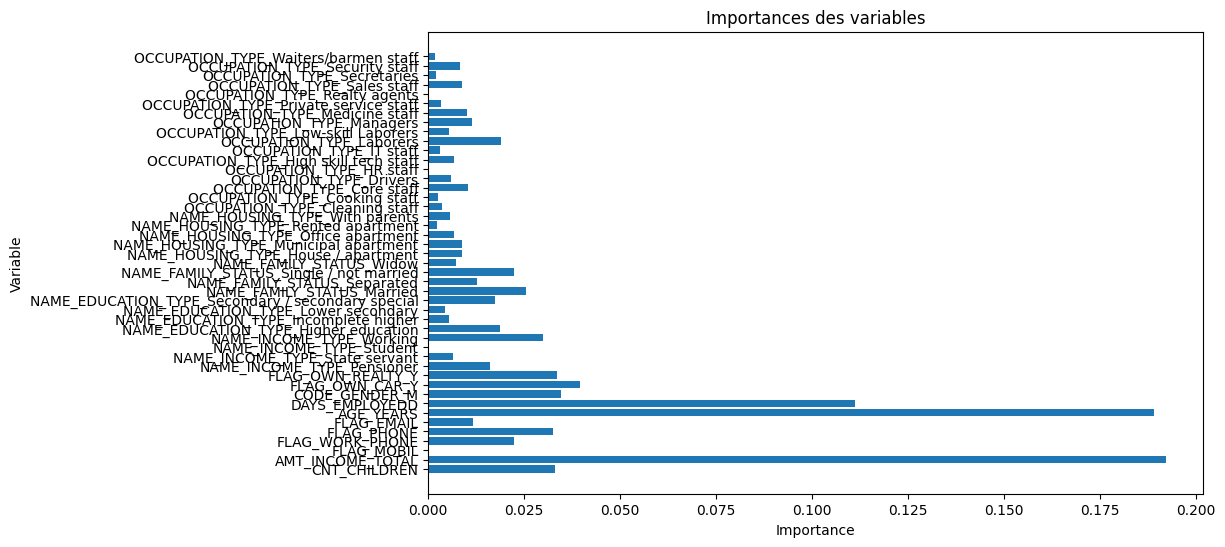

In [37]:
import matplotlib.pyplot as plt

importances = random_forest_model.feature_importances_

# Obtenir les noms des variables
variable_names = X_train.columns  # Supposons que X soit votre DataFrame d'entraînement

# Créer un graphique à barres pour afficher les importances des variables
plt.figure(figsize=(10, 6))
plt.barh(variable_names, importances)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importances des variables')
plt.show()

Les variables proches de 0 sont des variables moins importantes

**Suppression des variables moins importantes**

In [38]:
import pandas as pd
import numpy as np

# Calculer les importances des variables
importances = random_forest_model.feature_importances_

# Obtenir les noms des variables
variable_names = X_train.columns

# Créer un DataFrame pour les importances des variables
feature_importances = pd.DataFrame({
    'Variable': variable_names,
    'Importance': importances
})

# Fixer un seuil pour supprimer les variables avec une importance proche de 0
threshold = 0.01  # Ajustez le seuil si nécessaire

# Identifier les variables importantes (importance > seuil)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Variable']

# Filtrer les colonnes importantes dans X_train et X_test
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Afficher les variables supprimées
variables_supprimees = feature_importances[feature_importances['Importance'] <= threshold]['Variable']
print("Variables supprimées :", list(variables_supprimees))

# Afficher la taille des nouvelles données
print("X_train_filtered shape:", X_train_filtered.shape)
print("X_test_filtered shape:", X_test_filtered.shape)


Variables supprimées : ['FLAG_MOBIL', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff', 'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Private service staff', 'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Sales staff', 'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Security staff', 'OCCUPATION_TYPE_Waiters/barmen staff']
X_train_filtered shape: (23177, 21)
X_test_filtered shape: (9933, 21)


Après avoir supprimé les variables moins pertinentes, nous allons réévaluer les différents modèles pour analyser leur impact sur les **performances**

Évaluation du modèle : Régression Logistique (données filtrées)
Accuracy : 0.99
Recall : 0.50
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.50      0.50      0.50      9933
weighted avg       0.99      0.99      0.99      9933



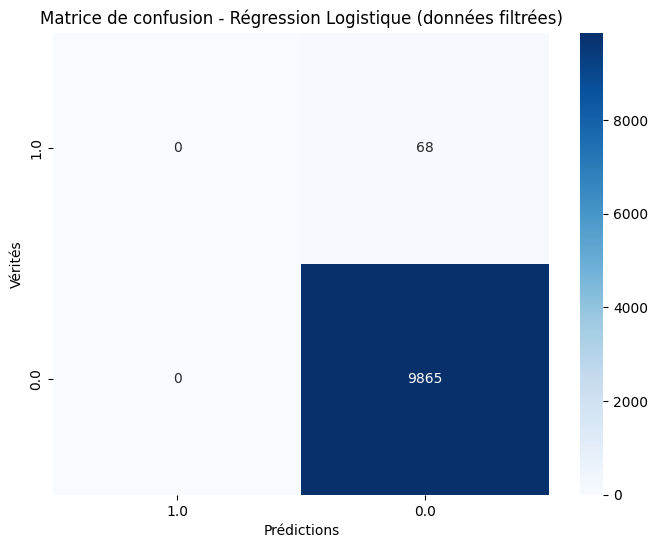

Évaluation du modèle : Random Forest (données filtrées)
Accuracy : 0.99
Recall : 0.60
              precision    recall  f1-score   support

         0.0       0.50      0.21      0.29        68
         1.0       0.99      1.00      1.00      9865

    accuracy                           0.99      9933
   macro avg       0.75      0.60      0.64      9933
weighted avg       0.99      0.99      0.99      9933



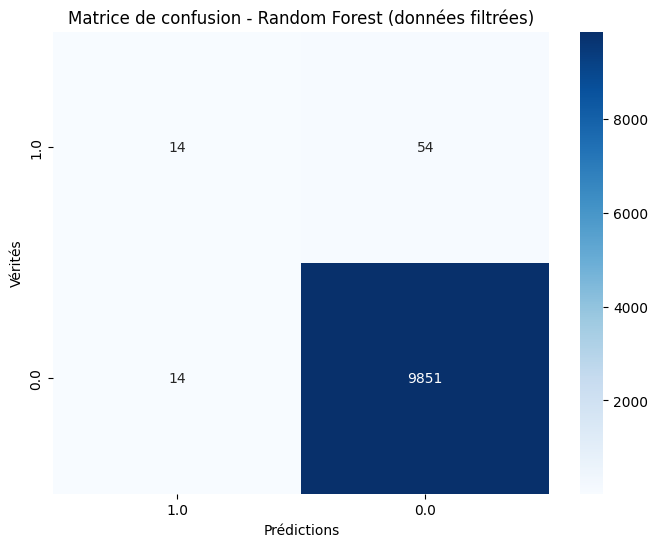

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# Standardisation pour les données filtrées
scaler = StandardScaler()
X_train_filtered_standardized = scaler.fit_transform(X_train_filtered)
X_test_filtered_standardized = scaler.transform(X_test_filtered)

# Modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_filtered_standardized, y_train)

# Modèle de forêt aléatoire
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_filtered, y_train)  # Les forêts aléatoires n'ont pas besoin de données standardisées

# Prédictions pour chaque modèle
y_pred_logistic = logistic_model.predict(X_test_filtered_standardized)
y_pred_rf = random_forest_model.predict(X_test_filtered)

# Fonction pour évaluer et afficher la matrice de confusion
def evaluate_model(y_true, y_pred, model_name, class_names):
    print(f"Évaluation du modèle : {model_name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Recall : {recall_score(y_true, y_pred, average='macro'):.2f}")  # Macro pour multi-classes
    print(classification_report(y_true, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités')
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

# Classes cibles (remplacez par les noms de vos classes)
class_names = y.unique()

# Évaluer la régression logistique
evaluate_model(y_test, y_pred_logistic, "Régression Logistique (données filtrées)", class_names)

# Évaluer Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest (données filtrées)", class_names)



**Interpretation**
---

**Résultats avant suppression :**

 Régression Logistique
- **Classe 0 (mauvais payeurs)**  
  - **Recall :** 0.09  
  - **Precision :** 0.01  

- **Classe 1 (bons payeurs)**  
  - **Recall :** 0.91  
  - **Precision :** 0.99  

 Forêt Aléatoire
- **Classe 0 (mauvais payeurs)**  
  - **Recall :** 0.26  
  - **Precision :** 0.35  

- **Classe 1 (bons payeurs)**  
  - **Recall :** 1.00  
  - **Precision :** 0.99  

---

 **Résultats après suppression :**

 Régression Logistique (données filtrées)
- **Classe 0 (mauvais payeurs)**  
  - **Recall :** 0.00  
  - **Precision :** 0.00  

- **Classe 1 (bons payeurs)**  
  - **Recall :** 1.00  
  - **Precision :** 0.99  

Forêt Aléatoire (données filtrées)
- **Classe 0 (mauvais payeurs)**  
  - **Recall :** 0.21  
  - **Precision :** 0.50  

- **Classe 1 (bons payeurs)**  
  - **Recall :** 1.00  
  - **Precision :** 0.99  

---

 **Analyse comparative :**

 Pour la classe 1 (bons payeurs)
- **Performances stables :** Les deux modèles maintiennent des performances très élevées (Recall et Précision proches de 1.00). Cela montre que la suppression des variables n'a pas affecté leur capacité à prédire les bons payeurs.

 Pour la classe 0 (mauvais payeurs)
- **Régression Logistique :** 
  - Avant suppression, le modèle détectait au moins certains mauvais payeurs (Recall = 0.09). Après suppression, il n'en détecte plus aucun (Recall = 0). Cela indique que les variables supprimées étaient cruciales pour cette classe.
- **Forêt Aléatoire :**
  - L'impact est moins sévère. Bien que le Recall ait légèrement diminué (de 0.26 à 0.21), la précision pour cette classe a augmenté (de 0.35 à 0.50), ce qui montre une meilleure exactitude dans les prédictions.

---

 **Conclusion globale :**
- Les performances pour la classe 1 (bons payeurs) restent excellentes pour les deux modèles, avant et après suppression. 
- Les performances pour la classe 0 (mauvais payeurs) se sont dégradées après suppression, particulièrement pour la Régression Logistique, qui devient incapable de détecter les mauvais payeurs.
- **Forêt Aléatoire** reste le modèle le plus performant et le plus robuste à la suppression de variables, tout en maintenant des performances équilibrées entre les deux classes.
---
En conclusion, la suppression des variables a eu un impact sur les performances du modèle pour la classe des mauvais payeurs. Il est donc nécessaire, si l'objectif de l'entreprise est de minimiser les pertes d'argent dues au crédit non remboursé, de réintroduire ces variables. Dans le cas contraire, le modèle est meilleur sans ces variables